In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [2]:
data=pd.read_csv('thyroid.csv')                                                  #reading the file
data.columns=['T3','TST','TSTI','TSH','Maximal Absolute Difference','Label']     #addigng column names
data.head() 

,T3,TST,TSTI,TSH,Maximal Absolute Difference,Label
0,113,9.9,3.1,2.0,5.9,1
1,127,12.9,2.4,1.4,0.6,1
2,109,5.3,1.6,1.4,1.5,1
3,105,7.3,1.5,1.5,-0.1,1
4,105,6.1,2.1,1.4,7.0,1


In [3]:
data.describe()                       #previewing the statistical info the given dataset

,T3,TST,TSTI,TSH,Maximal Absolute Difference,Label
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,109.607477,9.803271,2.049533,2.889252,4.206075,1.443925
std,13.175063,4.708332,1.422777,6.130868,8.088786,0.727808
min,65.000000,0.500000,0.200000,0.100000,-0.700000,1.000000
25%,103.000000,7.100000,1.325000,1.000000,0.525000,1.000000
50%,110.000000,9.200000,1.700000,1.300000,2.000000,1.000000
75%,117.750000,11.300000,2.200000,1.700000,4.100000,2.000000
max,144.000000,25.300000,10.000000,56.400000,56.300000,3.000000


In [4]:
p=data['Label']                     #preparing the label
p=pd.DataFrame(p)                   #converting into dataframe
p.head() 

,Label
0,1
1,1
2,1
3,1
4,1


In [5]:
k=p['Label']                                        #preparing the label
k=pd.DataFrame(k)                                   #coverting into dataframe
k["Label"].replace({1: 0, 2: 1,3:2}, inplace=True)  #replacing the column values
z=k['Label']                                        #copying the variable
z 

0      0
1      0
2      0
3      0
4      0
      ..
209    2
210    2
211    2
212    2
213    2
Name: Label, Length: 214, dtype: int64

In [6]:
X=data.iloc[:, [0,1,2,3,4]].values
X

array([[113. ,   9.9,   3.1,   2. ,   5.9],
       [127. ,  12.9,   2.4,   1.4,   0.6],
       [109. ,   5.3,   1.6,   1.4,   1.5],
       ...,
       [103. ,   5.1,   1.4,   1.2,   5. ],
       [ 97. ,   4.7,   1.1,   2.1,  12.6],
       [102. ,   5.3,   1.4,   1.3,   6.7]])

In [7]:
m=X.shape[0]
m
n=X.shape[1]
n
n_iter=100

In [8]:
K=3

In [9]:
Centroids=np.array([]).reshape(n,0) 

In [10]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [11]:
Output={}


In [12]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
       tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
       EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [13]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(5,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [14]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(5,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

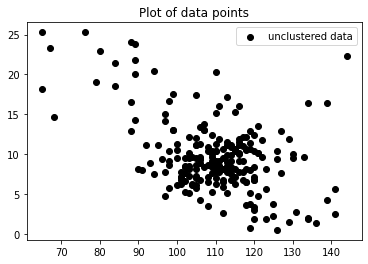

In [15]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.legend()
plt.title('Plot of data points')
plt.show()

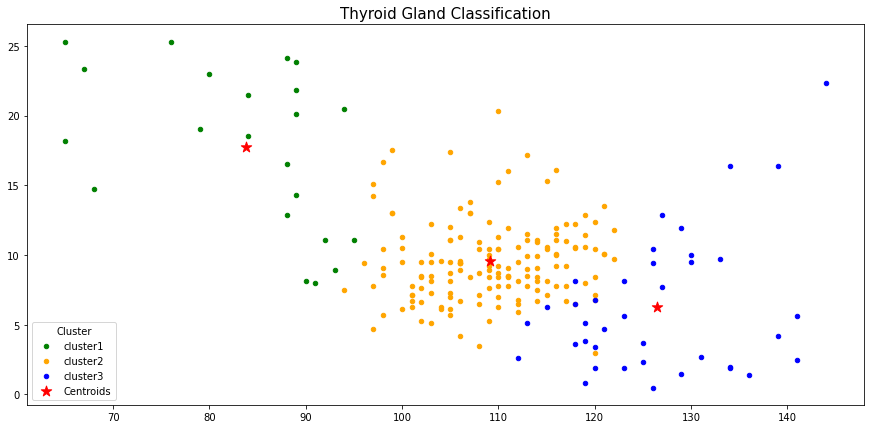

In [16]:
plt.figure(figsize=(15,7))
color=['green','orange','blue']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k],s=20)
plt.scatter(Centroids[0,:],Centroids[1,:],s=120,c='red',label='Centroids',marker='*')
plt.legend()
plt.title('Thyroid Gland Classification',fontsize=15)                                               #adding title to the scatter plot
plt.legend(title = 'Cluster')  
plt.show()

In [18]:
from sklearn.cluster import KMeans 

In [19]:
kmeans = KMeans(n_clusters = 3, random_state=101)   # number of clusters set to 5

In [20]:
y=kmeans.fit_predict(X)  

In [21]:
clusters=kmeans.labels_    #adding the labels to the variable
clusters                   #previewing

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0])

In [22]:
centers = kmeans.cluster_centers_      #finding the centriods of the clusters.
centers                                #previewing the centriods

array([[112.23684211,   9.54144737,   1.80263158,   1.31118421,
          2.58618421],
       [ 89.94871795,  14.71794872,   3.64615385,   1.16153846,
          0.95128205],
       [125.56521739,   3.2       ,   0.97391304,  16.24782609,
         20.43043478]])

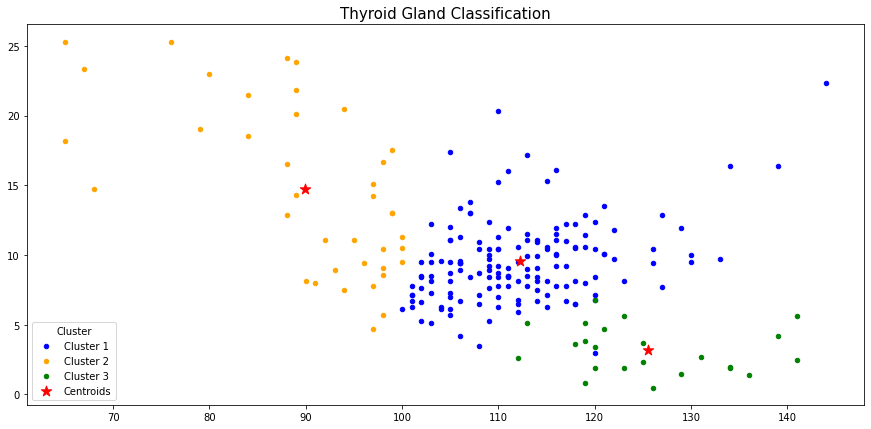

In [23]:
plt.figure(figsize=(15,7))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 20, c = 'b', label = 'Cluster 1')             #plottiing cluster 1
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 20, c = 'Orange', label = 'Cluster 2')        #plottiing cluster 2
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 20, c = 'Green', label = 'Cluster 3')         #plottiing cluster 3
plt.scatter(centers[:, 0], centers[:, 1], s = 120, c = 'Red', label = 'Centroids',marker = '*')     #adding centers to the scatterplot
plt.title('Thyroid Gland Classification',fontsize=15)                                               #adding title to the scatter plot
plt.legend(title = 'Cluster')                                                                       #Adding title to the legend
plt.show()                                                                                          #previewing the scatterplot

In [24]:
from sklearn.metrics import classification_report, confusion_matrix     #importin classification report and confusion matrix
from sklearn import metrics  

In [25]:
print(classification_report(clusters,z))                #printing the classification report

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       152
           1       0.71      0.64      0.68        39
           2       0.77      1.00      0.87        23

    accuracy                           0.86       214
   macro avg       0.80      0.85      0.82       214
weighted avg       0.86      0.86      0.86       214



Text(0.5, 1.0, 'Kmeans using SKlearn')

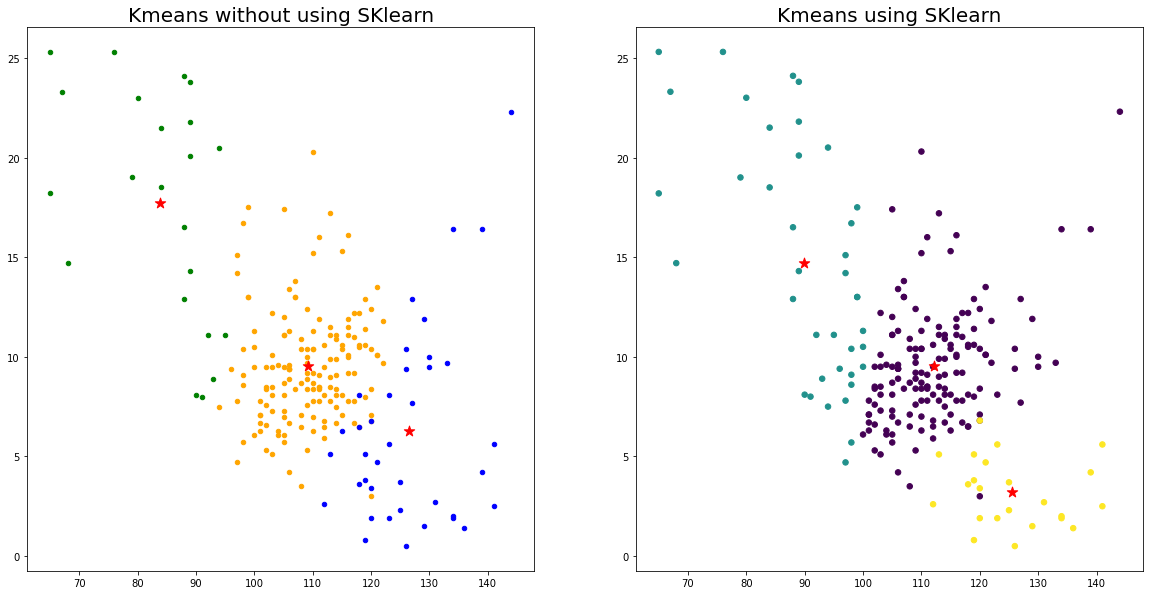

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
color=['green','orange','blue']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    axes[0].scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k],s=20)
axes[0].scatter(Centroids[0,:],Centroids[1,:],s=120,c='red',label='Centroids',marker='*')
axes[0].set_title("Kmeans without using SKlearn",fontsize=20)
axes[1].scatter(X[:, 0], X[:, 1], c=clusters, s=30)
axes[1].scatter(centers[:,0],centers[:,1],marker="*",color="red",s=120)
axes[1].set_title("Kmeans using SKlearn",fontsize=20)